In [1]:
from common.utility import show_implementation
import numpy as np
import matplotlib.pyplot as plt

# Multilayer Perceptron
## Motivation
As we have discussed in the [Perceptron Chapter](./perceptron.ipynb), perceptrons are able to solve any linearly separable problems.

However, if the problem is not linearly separable, a single perceptron will be unable to solve it.

Consider the XOR problem with the following truth table

|$$x_1$$|$$x_2$$|$$y$$|
|-------|-------|-----|
|   0   |   0   |  0  |
|   1   |   0   |  1  |
|   0   |   1   |  1  |
|   1   |   1   |  0  |

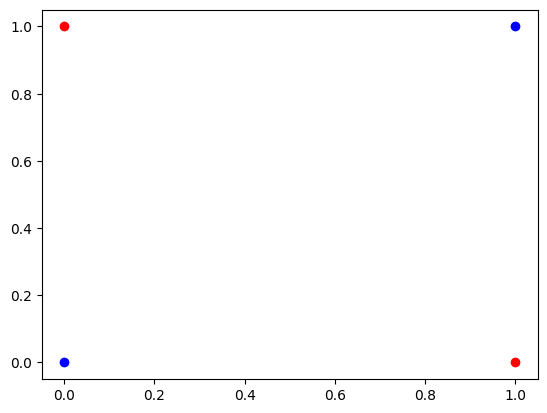

In [2]:
pts = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [0, 1, 1, 0]


fig, ax = plt.subplots(1, 1)

for (x, y), l in zip(pts, labels):
    plt.scatter([x], [y], color="red" if l == 1 else "blue")

plt.show()

As we can see, there is no single line that can separate the 2 classes, and thus a perceptron will be unable to solve this problem.

However, suppose that we have one perceptron that separates the classes as below.

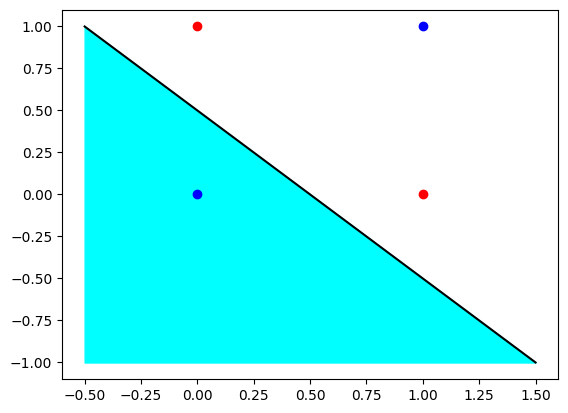

In [3]:
pts = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [0, 1, 1, 0]

fig, ax = plt.subplots(1, 1)

xs = np.linspace(-0.5, 1.5, 10)
ys = -xs + 0.5
plt.plot(xs, ys, "-k")

ax.fill_between(xs, ys, ys[-1], color=(0, 1, 1))

for (x, y), l in zip(pts, labels):
    plt.scatter([x], [y], color="red" if l == 1 else "blue")

plt.show()

Here, we denote the points within the cyan area as $C_1$, and those outside as $C_2$.

And we have another that separates the class as such:

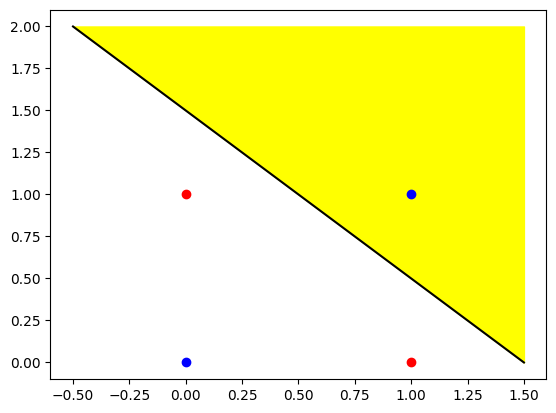

In [4]:
pts = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [0, 1, 1, 0]

fig, ax = plt.subplots(1, 1)

xs = np.linspace(-0.5, 1.5, 10)
ys = -xs + 1.5
plt.plot(xs, ys, "-k")

ax.fill_between(xs, ys, ys[0], color=(1, 1, 0))

for (x, y), l in zip(pts, labels):
    plt.scatter([x], [y], color="red" if l == 1 else "blue")

plt.show()

The resultant separation would be 

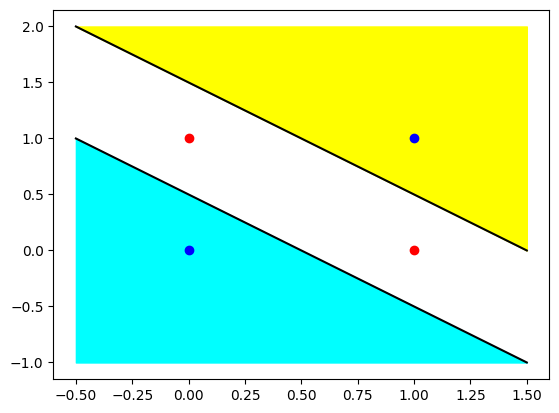

In [5]:
pts = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [0, 1, 1, 0]

fig, ax = plt.subplots(1, 1)

xs = np.linspace(-0.5, 1.5, 10)
ys = -xs + 1.5
plt.plot(xs, ys, "-k")

y2s = -xs + 0.5
plt.plot(xs, y2s, "-k")

ax.fill_between(xs, ys, ys[0], color=(1, 1, 0))
ax.fill_between(xs, y2s, y2s[-1], color=(0, 1, 1))

for (x, y), l in zip(pts, labels):
    plt.scatter([x], [y], color="red" if l == 1 else "blue")

plt.show()

Now suppose we take the 2 outputs from the 2 perceptron, and connect them as inputs to a 3rd perceptron.

For this 3rd perceptron, we make it exhibit the behaviour of the [NOR gate](./perceptron.ipynb#nor_gate).

Then notice that the resultant output of the 3rd perceptron would be 1 if the point lies on either of the coloured regions, and 0 if it lies outside of both regions.

Notice that this indeed separates the points as we desired, and thus solves the XOR problem.

And thus, we get the following neural network:

![Neural network that solves XOR](./img/xor.png)


Below is the implementation of multiple perceptrons.

In [6]:
from module.classical_perceptron import ClassicalPerceptron

inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [0, 1, 1, 0]

p1 = ClassicalPerceptron(2, [0.5, -1, -1])
p2 = ClassicalPerceptron(2, [-1.5, 1, 1])

p3 = ClassicalPerceptron(2, [0.5, -1, -1])


def classify(p1, p2, p3, input):
    y1 = p1.get_output(input)
    y2 = p2.get_output(input)
    return p3.get_output([y1, y2])


for input, label in zip(inputs, labels):
    print(
        f"inputs: {input}, output: {classify(p1, p2, p3, input)}, correct label: {label}"
    )

inputs: (0, 0), output: 0, correct label: 0
inputs: (0, 1), output: 1, correct label: 1
inputs: (1, 0), output: 1, correct label: 1
inputs: (1, 1), output: 0, correct label: 0


This brings us to one important observation: Non-linearly separable problem can be solved using perceptron by using multiple layers.

## Definition
Multilayer perceptrons are generalization of single-layer perceptron.

They contain:
* An input layer
* One or more hidden layer
* An output layer

![Example of multilayer neural network](./img/multilayer_example.png)

<center>Example of multilayer neural network</center>

### Notations
$n_i$ = number of neurons in layer $i$

$w^{(i)}_{b, a}$ = weights for layer $i$, between neuron $a$ and $b$.

$v^{(i)}_{a}$ = induced local field of neuron $a$ in layer $i$

$\varphi^{i}(\cdot)$ = activation function for layer $i$

$\vec x$ = input for neural network

$x^{(i)}_{a}$ = output of neuron $a$ at layer $i$. Also the input of neurons in layer $i+1$

$\vec y$ = output of neural network

### Activation Function
If the every activation function in the neural network is linear, then it will be equivalent to a single-layer neural network.

To see this, consider two adjacent layers (layer $i$ and $j$) in the network.

For a given neuron in the layer $i$,

$$
y_i = \sum_j w_j y_i = \sum_j w_j \sum_i w_i x_i = \sum_j \sum_i w_iw_jx_i = \sum_i w'_i x_i, \quad w'_i = w_i \sum_j w_j
$$

Thus, we can always express 2 adjacent layer as a single layer with new weights.
Hence, if all the activation function is layer, it can be condensed into a single-layer instead.

## Learning
### Back Propagation

In a similar fashion that single perceptron learn, we will now formalize a way for a multilayer neural network to learn.

We feed an input into the network and obtain its output. 
Using this output, we can determine the error signal.
With this error signal, we adjust all the weights by a certain amount based on the gradient of the error.
All that is left is to determine the gradient of the error.

#### Gradient Derivation
Suppose we have a 3 layer network.
Let us compute the gradient of the error with respect to a certain weight of the last layer ($w^{(3)}_{ji}$).

Let our LMS error be $E(x) = \frac{1}{2} \vec e(n)^2 = \frac{1}{2} \sum_j (d_j(n) - x_{ j}(n))^2$

Thus

$$
\frac{\partial E(n)}{\partial w^{(3)}_{ji}(n)} = \frac{\partial E(n)}{\partial x_{ j}(n)} \times \frac{\partial x_{ j}(n)}{\partial v^{(3)}_j(n)} \times \frac{\partial v^{(3)}_j(n)}{\partial w^{(3)}_{ji}(n)} 
$$

by the chain rule

And computing each of the derivatives separately, we get:

$$
\frac{\partial E(n)}{\partial \vec x_{ j}(n)}  = - e_j\\
\frac{\partial x_{ j}(n)}{\partial v^{(3)}_j(n)} = \varphi '^{(3)} (v^{(3)}_j(n))\\
\frac{\partial v^{(3)}_j(n)}{\partial w^{(3)}_{ji}(n)} = x^{(2)}_{i}(n) \\
$$

Hence,

$$
\frac{\partial E(n)}{\partial w^{(3)}_{ji}(n)} = - e_j \varphi '^{(3)} (v^{(3)}_j(n))x^{(2)}_{i}(n)
$$

If we define $\delta ^{(3)}_j (n) = e_j \varphi '^{(3)} (v^{(3)}_j(n))$, we get

$$
\frac{\partial E(n)}{\partial w^{(3)}_{ji}(n)} = -\delta ^{(3)}_j (n)x^{(2)}_{i}(n)
$$

which is the form of a vector multiplied with the input signal.

Thus, our new weight would be 

$$
w^{(3)}_{ji}(n+1) = w^{(3)}_{ji}(n) + \eta \delta ^{(3)}_j (n)x^{(2)}_{i}(n)
$$



---

Now suppose we wish to find the gradient of the error with respect to a certain weight of the 2nd-last layer ($w^{(2)}_{ji}$).

In a similar fashion, we will get


$$
\frac{\partial E(n)}{\partial w^{(2)}_{ji}(n)} = \frac{\partial E(n)}{\partial x_{out, k}(n)} 
\times \frac{\partial x_{out, k}(n)}{\partial v^{(3)}_k(n)} 
\times \frac{\partial v^{(3)}_k(n)}{\partial x^{(3)}_{kj}(n)} 
\times \frac{\partial x_{k, j}(n)}{\partial v^{(2)}_j(n)} 
\times \frac{\partial v^{(2)}_j(n)}{\partial w^{(2)}_{ji}(n)} 
$$

where

$$
\frac{\partial E(n)}{\partial \vec x_{out, k}(n)}  = - e_k\\
\frac{\partial x_{out, k}(n)}{\partial v^{(3)}_k(n)} = \varphi '^{(3)} (v^{(3)}_k(n))\\
\frac{\partial v^{(3)}_k(n)}{\partial x^{(3)}_{kj}(n)}  = w^{(3)}_{k,j}(n) \\
\frac{\partial x_{k, j}(n)}{\partial v^{(2)}_j(n)}  = \varphi '^{(2)} (v^{(2)}_j(n))\\
\frac{\partial v^{(2)}_j(n)}{\partial w^{(2)}_{ji}(n)}  =  x^{(1)}_{i}(n) \\
$$

Hence we get 

$$
- e_k \varphi '^{(3)} (v^{(3)}_k(n)) w^{(3)}_{k,j}(n) \varphi '^{(2)} (v^{(2)}_j(n)) x^{(1)}_{i}(n)
$$

However, notice that one neuron in the earlier layer can affect multiple output neurons.
Thus, each of the weights in these neurons can contribute to error in multiple output neurons.
Hence, the gradient of the error with respect to a specific weight would be the sum of the gradient of error across all the output neurons.

Thus we get:

$$
\frac{\partial E(n)}{\partial w^{(3)}_{ji}(n)} = 
- \sum_k^{n_3} e_k \varphi '^{(3)} (v^{(3)}_k(n)) w^{(3)}_{k,j}(n) \varphi '^{(2)} (v^{(2)}_j(n)) x^{(1)}_{i}(n)
$$

Note that we do not need to do this in the previous layer because **each weight of the last layer only affect 1 output neuron.**

Simplifying the expression, we get

$$
\begin{align}
\frac{\partial E(n)}{\partial w^{(3)}_{ji}(n)} 
&= - \sum_k^{n_3} \delta ^{(3)}_k (n) w^{(3)}_{k,j}(n) \varphi '^{(2)} (v^{(2)}_j(n)) x^{(1)}_{i}(n) \\
&= - x^{(1)}_{i}(n) \sum_k^{n_3} \delta ^{(3)}_k (n) w^{(3)}_{k,j}(n) \varphi '^{(2)} (v^{(2)}_j(n)) 
\end{align}
$$

We define the **output error of the hidden neuron** as 
$$
\delta ^{(2)}_j (n)= \left(\sum_k^{n_3} \delta ^{(3)}_k (n) w^{(3)}_{k,j}(n)\right) \varphi '^{(2)} (v^{(2)}_j(n)) 
$$

And thus, our gradient simplifies to 
$$
\frac{\partial E(n)}{\partial w^{(3)}_{ji}(n)} 
= - \delta ^{(2)}(n)_jx^{(1)}_{i}(n) 
$$

Thus, our new weight would be 

$$
w^{(2)}_{ji}(n+1) = w^{(2)}_{ji}(n) + \eta \delta ^{(2)}(n)_jx^{(1)}_{i}(n) 
$$


---
Notice that for both the output neurons and hidden neurons, the update function share a similar form.
The main difference lies in how we compute the gradient of the output error ($\delta$)

For output layer: $\delta^{(i)} _j = (d_j - x^{(i)}_{out,j}) \varphi '(v^{(i)}_j)$

For hidden layer: $\delta ^{(i)}_j = \left(\sum_k^{n_{i+1}} \delta ^{(i+1)}_k w^{(i+1)}_{k,j}\right) \varphi '^{(i)} (v^{(i)}_j)$

Notice that the first product $\left(\sum_k^{n_{i+1}} \delta ^{(i+1)}_k w^{(i+1)}_{k,j}\right)$ for the error of the hidden layer is similar to the form of the induced local field for a given neuron, where it is a product of weights with some other term.

Thus, one can view it as a new network with all its connections reversed, thus a **back propagation**

#### Overall Algorithm
Thus, we get the follow steps to perform back propagation

1. Forward Pass: Compute the output signal ($x^{(i)}_j$) of each neuron after passing the input through the network
2. Backward Pass: Start from the output layer, recursively compute the $\delta$ of each neuron. Update the weight according to the $\delta$

### Implementation
Thus, this is the implementation of the multilayer perceptron.

In [7]:
from module.mlp import MLP

show_implementation(MLP)

class MLP:
    def __init__(self, shape, activation_functions=Sigmoid(), learning_rate=0.1):
        assert len(shape) >= 2
        shape = np.array(shape)
        self.input_size = shape[0]
        self.output_size = shape[-1]
        self.size = len(shape) -1 
        self.shape = shape
        self.neurons = [[LearningPerceptron(prev_size, activation_functions, learning_rate=learning_rate) \
                         for _ in range(size)] for size, prev_size in zip(shape[1:], shape)]
        self.neurons.insert(0, []) # Maintain that layer 0 is input
        
    def get_outputs(self, input, layer=None):
        assert len(input) == self.input_size
        
        if layer == None:
            layer = self.size
        
        if layer == 0:
            return input
        
        prev_layer_outputs = self.get_outputs(input, layer-1)
        
        output = [p.get_output(prev_layer_outputs) for p in self.neurons[layer]]
        
        return np.array(output)

    
    def get

We will try to use this neural network to solve the XOR problem again.
Now, we are using sigmoid as the activation function for all layers (including the output).
Thus, the output will range from 0 to 1.

In [8]:
np.random.seed(0)  # Fix seed for reproducibility

inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [(0), (1), (1), (0)]

mlp = MLP((2, 2, 1), learning_rate=0.1)

for i in range(10000):
    for input, label in zip(inputs, labels):
        mlp.update_weights(input, label)

for input, label in zip(inputs, labels):
    print(f"inputs: {input}, output: {mlp.get_outputs(input)}, correct label: {label}")

print("\nAfter replacing last neuron's activation function with hard limiter")

from module.activation_function import HardLimiter

mlp.neurons[-1][0].activation_function = HardLimiter()

for input, label in zip(inputs, labels):
    print(f"inputs: {input}, output: {mlp.get_outputs(input)}, correct label: {label}")

inputs: (0, 0), output: [0.16358691], correct label: 0
inputs: (0, 1), output: [0.80803043], correct label: 1
inputs: (1, 0), output: [0.80612637], correct label: 1
inputs: (1, 1), output: [0.26210361], correct label: 0

After replacing last neuron's activation function with hard limiter
inputs: (0, 0), output: [0], correct label: 0
inputs: (0, 1), output: [1], correct label: 1
inputs: (1, 0), output: [1], correct label: 1
inputs: (1, 1), output: [0], correct label: 0


#### Termination
Because LMS error may not converge, we need a stopping criteria for our training.

Possible criterias:
* Error smaller than some threshold
* A certain number of epoch is reached
* Change of error per epoch is small
* Stablization of weights 

### Function Approximation
It is proven that any bounded continuous function can be approximated by a perceptron network which uses non-constant, bounded, and monotone-increasing continuous **activation function** $\varphi$.

That is to say for any function $f$ which satisfy the above can be approximated as:

$$
f(x_1, \dots, x_{m_0}) \approx 
\sum_{i=1}^{m_1} \alpha_i \varphi \left( \sum _{j=1} ^{m_0} w_{ij} x_j + b_i \right)
$$

Thus any function can be approximated using:
* $m_0$ input neuron
* 1 hidden layer (Only 1 $\varphi$)
* $m_1$ hidden neurons ($m_1$ depends on the function)
* 1 output neuron

Thus, the theorem states that any function of with those properties can be approximated using a neural network with just 1 hidden layer.
However, note that [finding the number of hidden neurons](./design_and_training.ipynb#hidden-neuron), $m_1$, may not that easy. 